In [69]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv


In [70]:
df = pd.read_csv("/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv")
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [71]:
print('Features of the dataset:')
for col in df.columns:
    print('   ',col)

Features of the dataset:
    Person ID
    Gender
    Age
    Occupation
    Sleep Duration
    Quality of Sleep
    Physical Activity Level
    Stress Level
    BMI Category
    Blood Pressure
    Heart Rate
    Daily Steps
    Sleep Disorder


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [73]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [74]:
df.duplicated().sum()

0

In [75]:
#The null values in Sleep Disorder feature suggest that 219 people do not have any sleep disorders and to replace null with None

df = df.fillna('None')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [76]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [77]:
df = df.drop('Person ID', axis=1)
df.shape

(374, 12)

In [78]:
#Blood Pressure is given in the form systolic/diastolic, therefore separating them in two different features
bp = df['Blood Pressure']
low_bp = bp.str.split("/").str.get(1)
high_bp = bp.str.split("/").str.get(0)
df['Systolic BP'] = high_bp.astype(int)
df['Diastolic BP'] = low_bp.astype(int)
df = df.drop(['Blood Pressure'], axis=1)
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


In [79]:
df.shape

(374, 13)

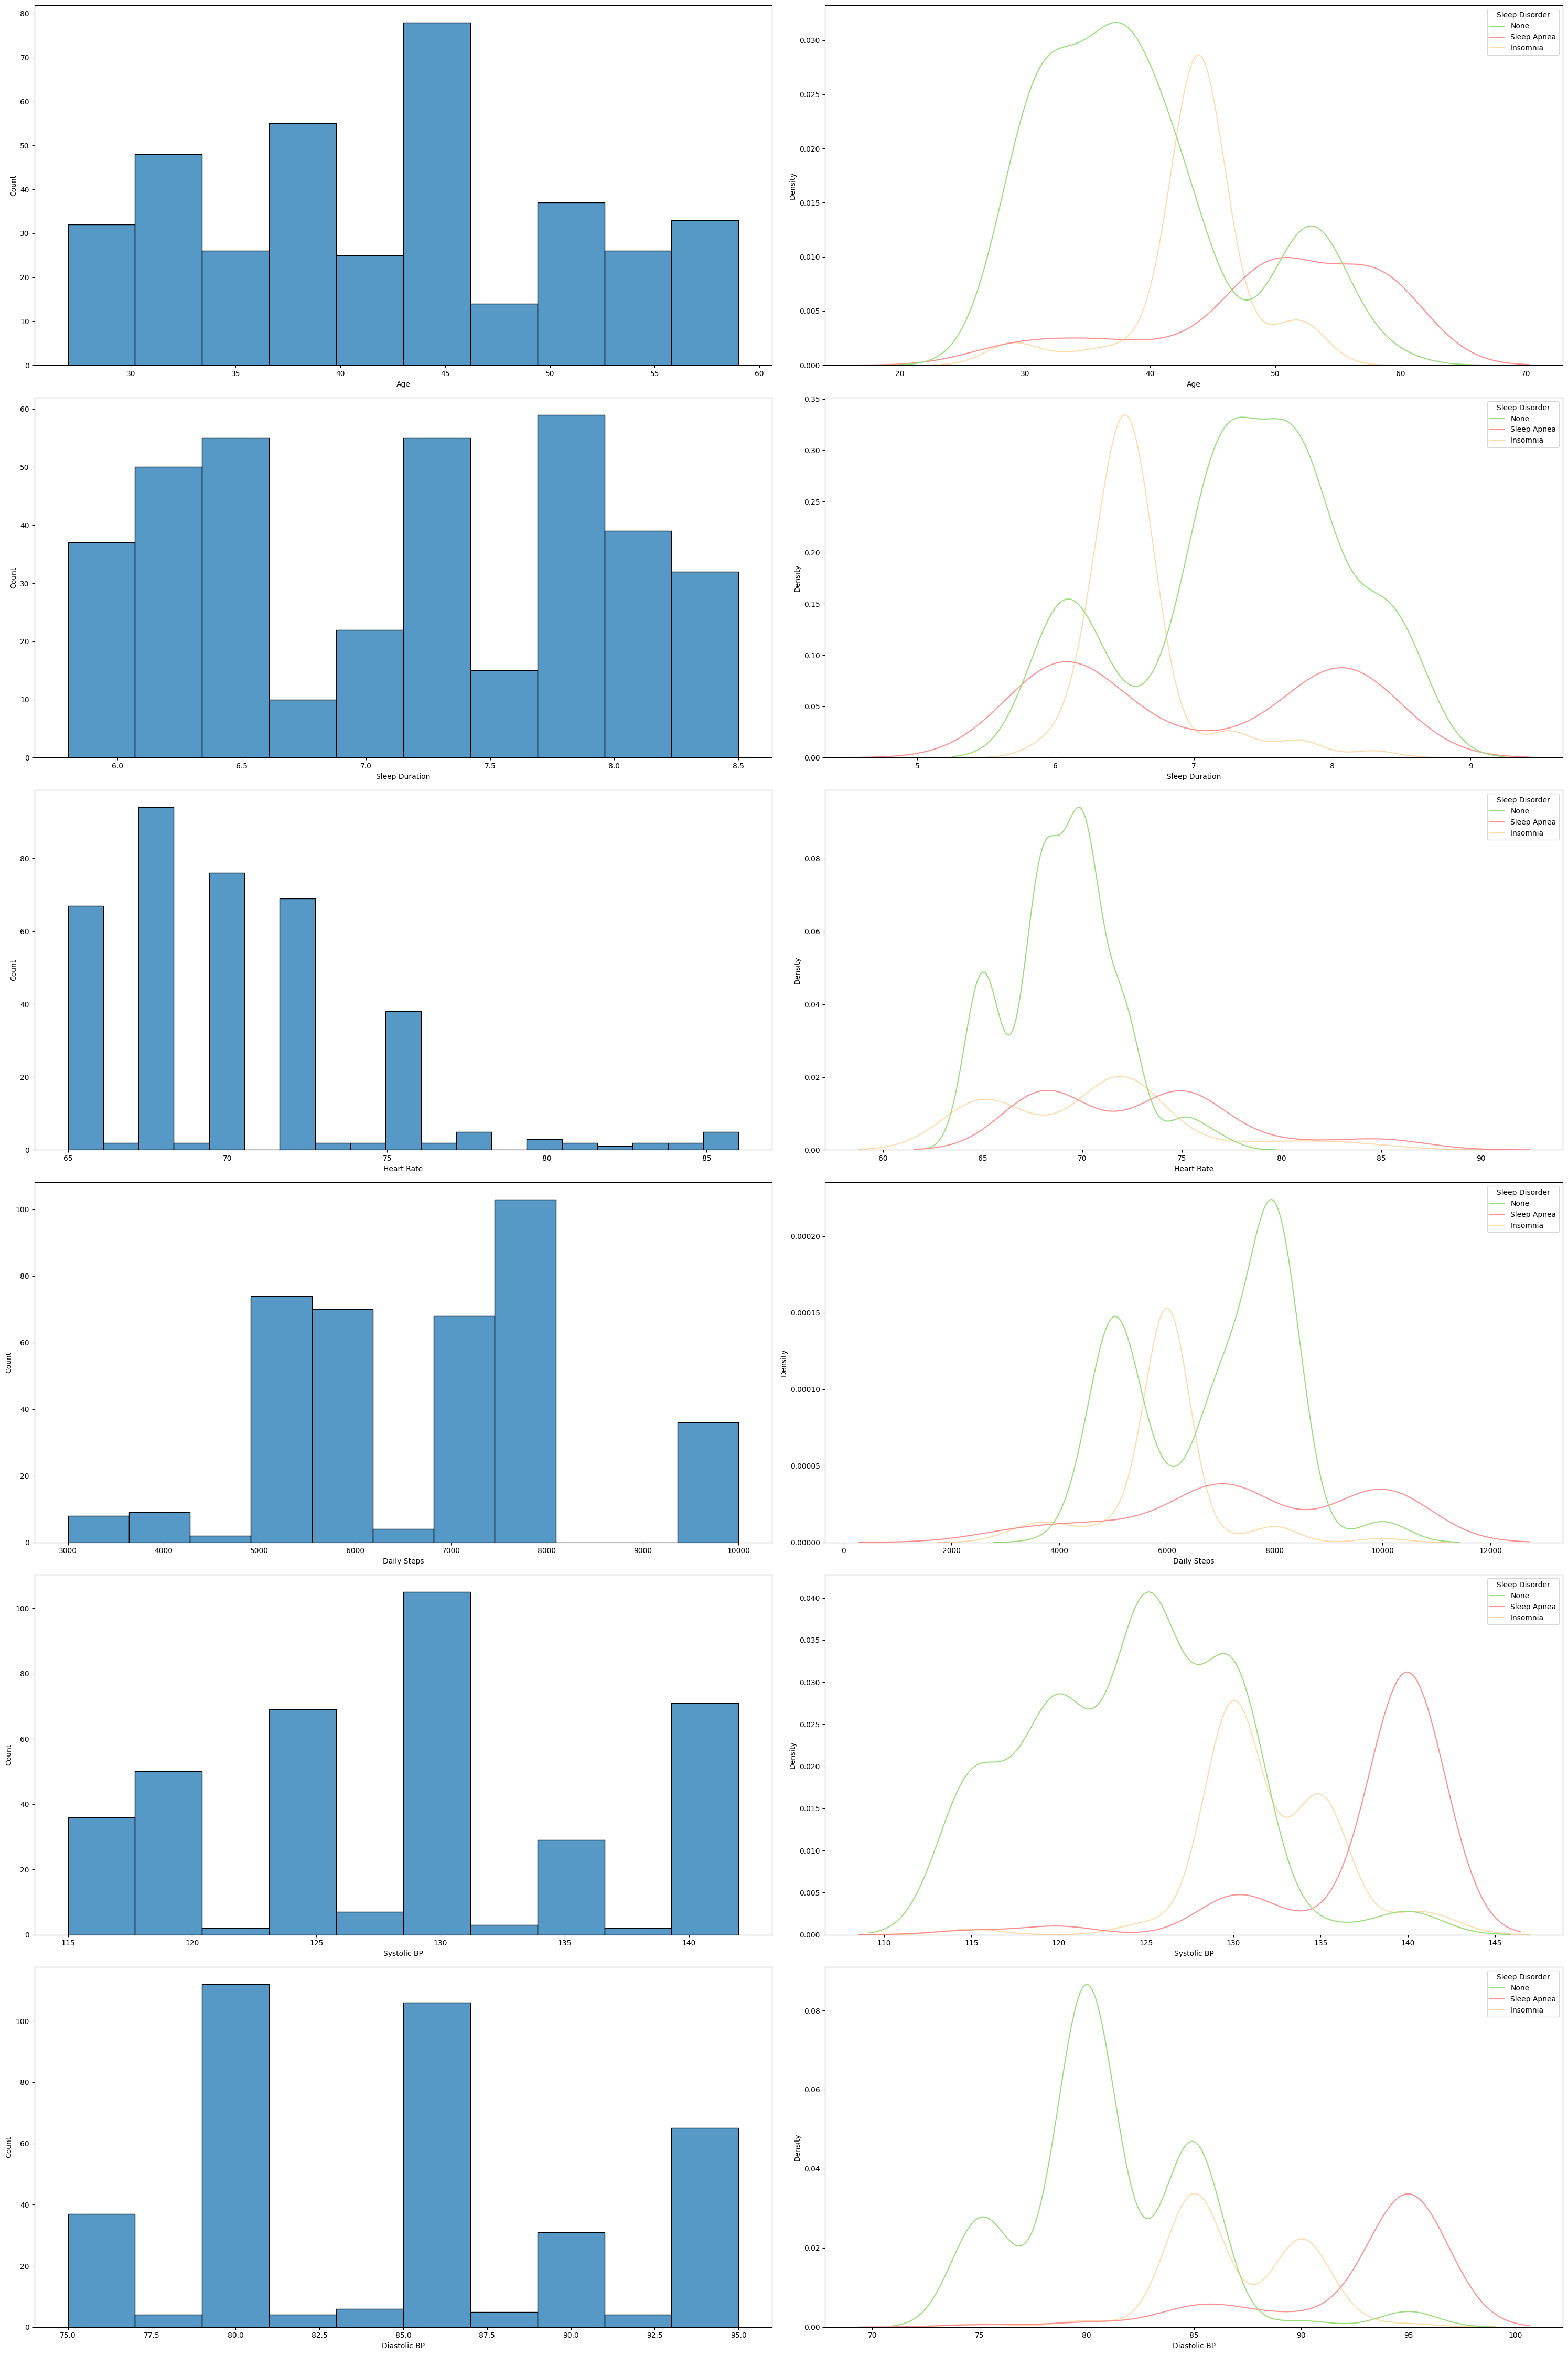

In [80]:
num_features = ['Age', 'Sleep Duration', 'Heart Rate', 'Daily Steps','Systolic BP','Diastolic BP']
colors = ['#808836','#FFBF00','#FF9A00','#D10363','#6FB2D2','#85C88A', '#EBD671', '#EEEEEE', '#00224D', '#FF9A00', '#AF8F6F']

fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(30,45))

for i in range(6):
    ax1 = sns.histplot(data=df,x=num_features[i], ax=axs[i,0], palette=colors)
    
    ax3 = sns.kdeplot(data=df, x=num_features[i], hue='Sleep Disorder', ax=axs[i,1], palette=['#9ADE7B','#FF8F8F', '#FFDBAA'])
    
plt.tight_layout()

Text(0.5, 1.0, 'Type of Sleep Disorder')

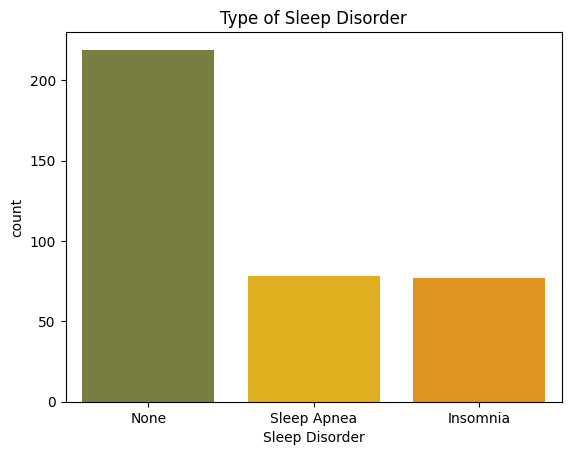

In [81]:
# Sleep Disorder
graph = sns.countplot(data=df, x='Sleep Disorder', palette=colors)
plt.title('Type of Sleep Disorder')

Text(0.5, 1.0, 'Gender distribution')

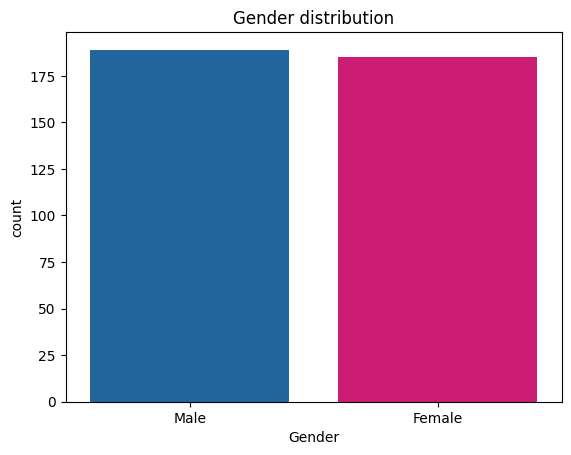

In [82]:
# Distribution of Genders
sns.countplot(data=df, x='Gender',palette=['#0F67B1','#E90074'])
plt.title('Gender distribution')

Text(0.5, 1.0, 'Distribution of occupations')

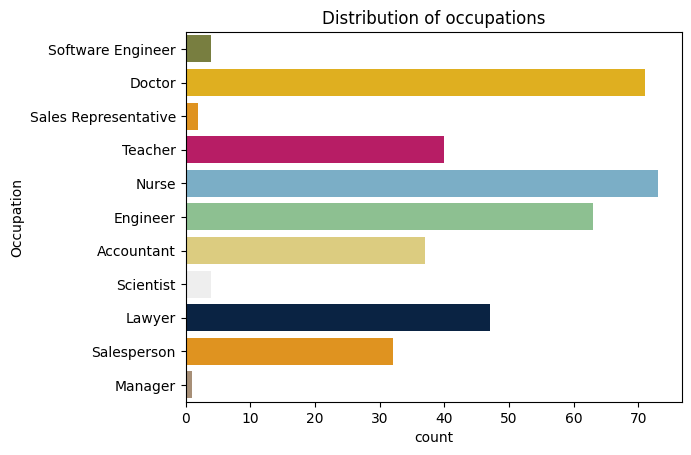

In [83]:
# Occupation
graph = sns.countplot(data=df, y='Occupation', palette=colors)
plt.title('Distribution of occupations')

Text(0.5, 1.0, 'Quality of Sleep')

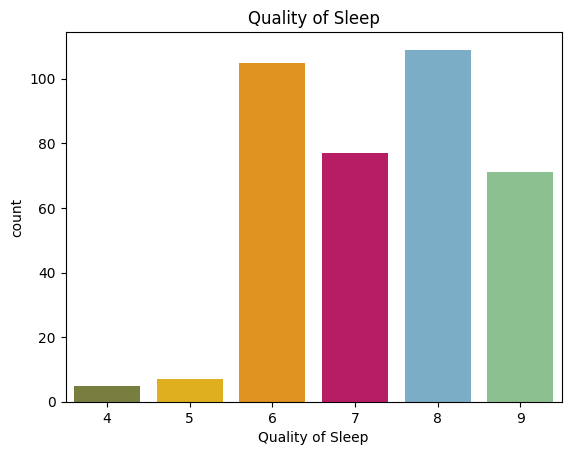

In [84]:
# Occupation
graph = sns.countplot(data=df, x='Quality of Sleep', palette=colors)
plt.title('Quality of Sleep')

In [85]:
df['Physical Activity Level'].nunique()

16

Text(0.5, 1.0, 'Activity Level')

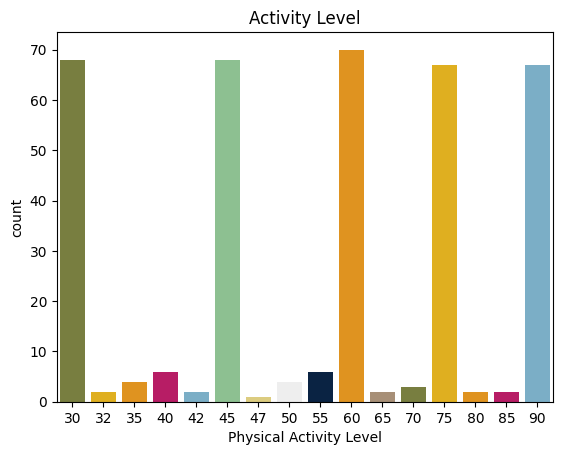

In [86]:
# Activity Level
graph = sns.countplot(data=df, x='Physical Activity Level', palette=colors)
plt.title('Activity Level')

Text(0.5, 1.0, 'Stress Level')

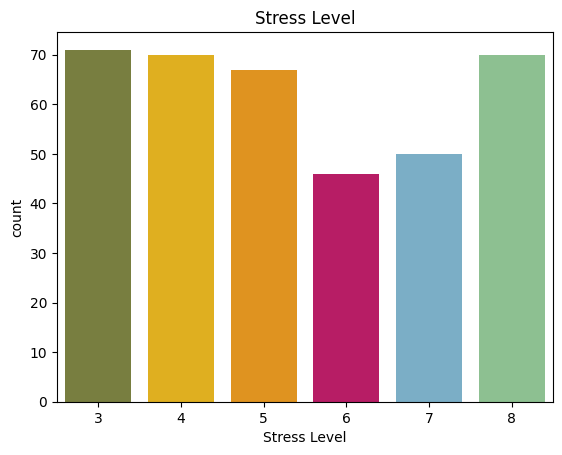

In [87]:
# Stress Level
graph = sns.countplot(data=df, x='Stress Level', palette=colors)
plt.title('Stress Level')

Text(0.5, 1.0, 'BMI')

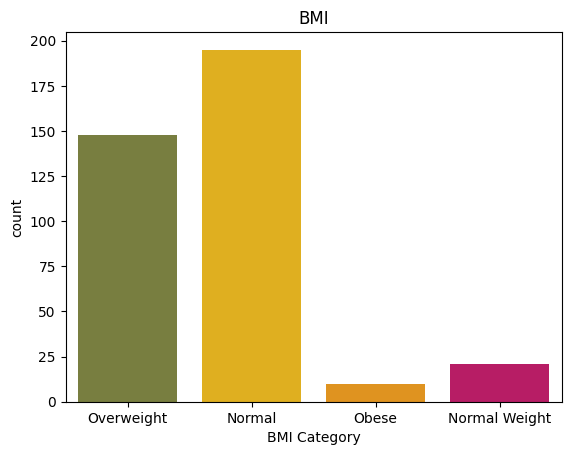

In [88]:
# BMI Category
graph = sns.countplot(data=df, x='BMI Category', palette=colors)
plt.title('BMI')


KeyboardInterrupt



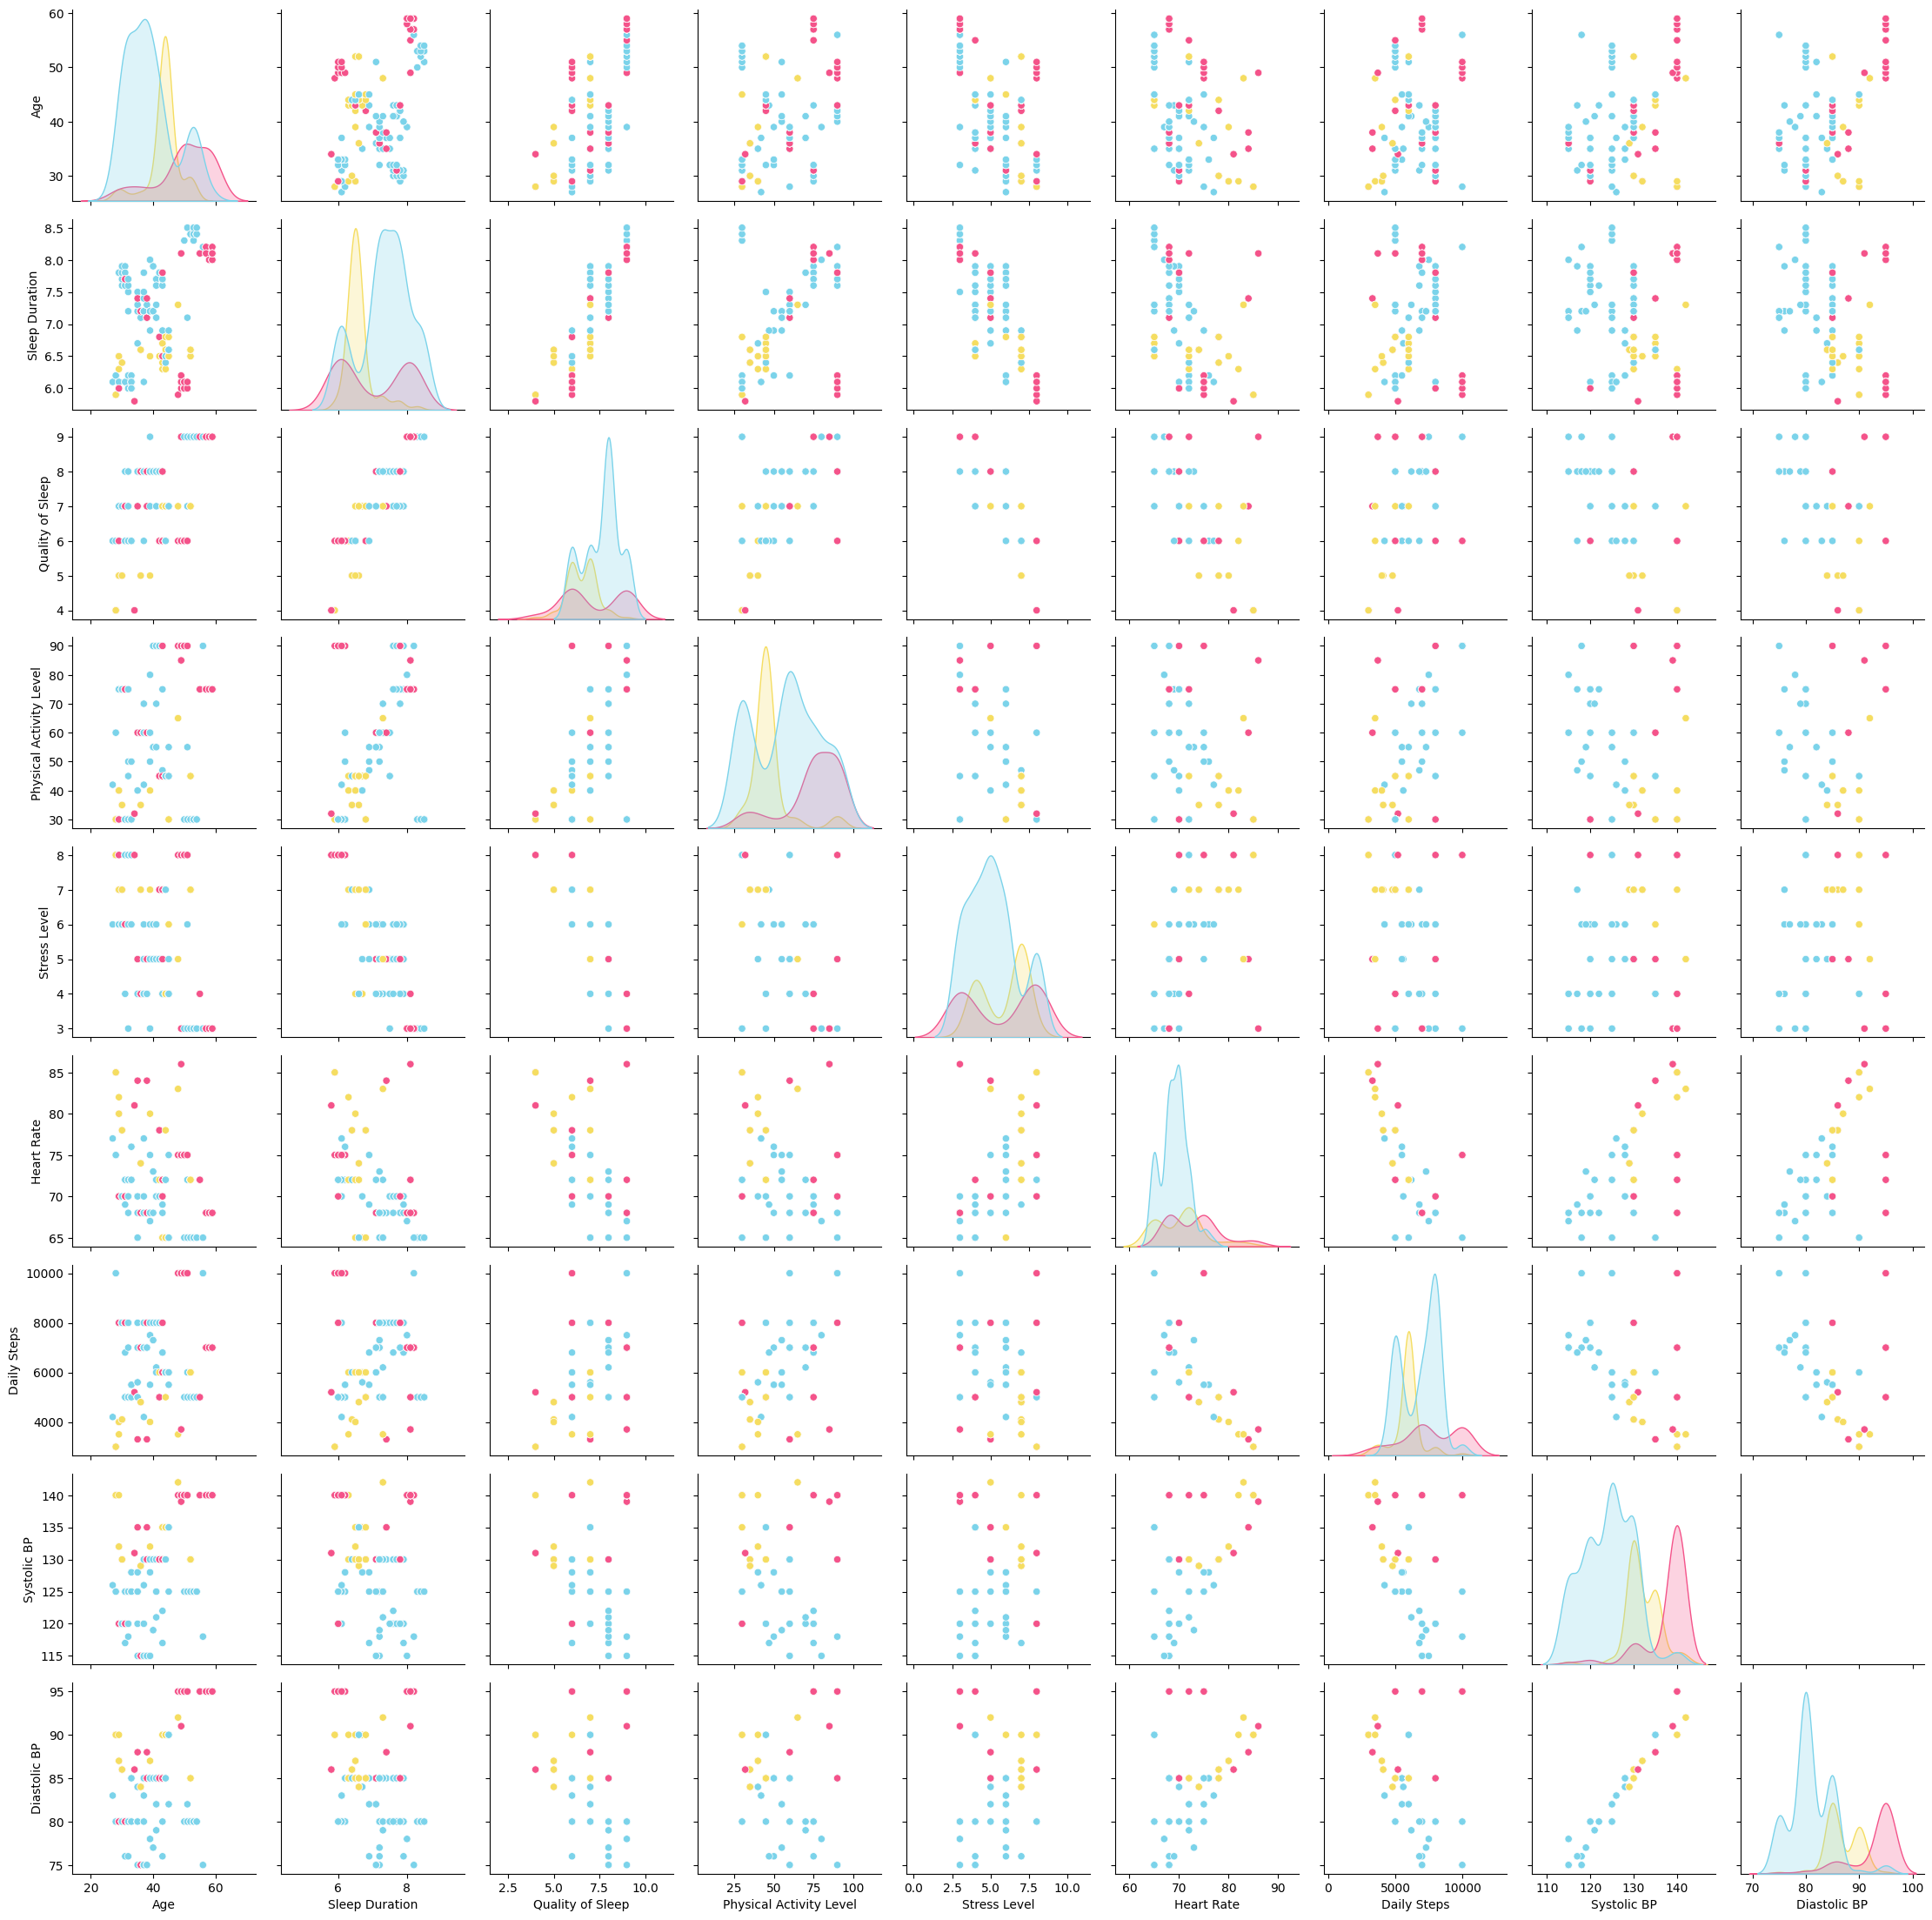

In [89]:
cat_features = ['Gender', 'Occupation','BMI Category', 'Quality of Sleep','Physical Activity Level','Stress Level','Sleep Disorder']
# Quality of Sleep, Physical Activity Level and Stress Level are ordinal features

num_features = ['Age','Sleep Duration','Heart Rate','Daily Steps','Systolic BP','Diastolic BP']

colors = ['#7BD3EA','#F4538A','#F5DD61','#A1EEBD','#F6F7C4','#F6D6D6', '#59D5E0','#FAA300']
sns.pairplot(df, hue='Sleep Disorder', palette=colors)

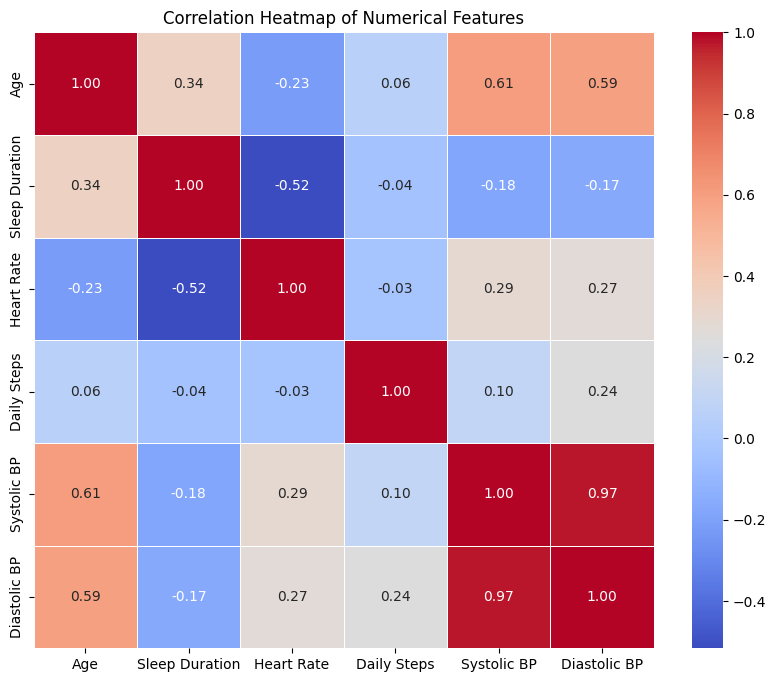

In [90]:
# Define numerical features
num_features = ['Age', 'Sleep Duration', 'Heart Rate', 'Daily Steps', 'Systolic BP','Diastolic BP']

# Calculate the correlation matrix
corr_matrix = df[num_features].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [104]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


In [105]:
from sklearn import preprocessing


label_encoder = preprocessing.LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Occupation'] = label_encoder.fit_transform(df['Occupation'])
df['BMI Category'] = label_encoder.fit_transform(df['BMI Category'])
df['Sleep Disorder'] = label_encoder.fit_transform(df['Sleep Disorder'])

In [106]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP
0,1,27,9,6.1,6,42,6,3,77,4200,1,126,83
1,1,28,1,6.2,6,60,8,0,75,10000,1,125,80
2,1,28,1,6.2,6,60,8,0,75,10000,1,125,80
3,1,28,6,5.9,4,30,8,2,85,3000,2,140,90
4,1,28,6,5.9,4,30,8,2,85,3000,2,140,90


In [108]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Prepare the data
X = df.drop(['Sleep Disorder'], axis=1)
y = df['Sleep Disorder']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [109]:
X

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Systolic BP,Diastolic BP
0,1,27,9,6.1,6,42,6,3,77,4200,126,83
1,1,28,1,6.2,6,60,8,0,75,10000,125,80
2,1,28,1,6.2,6,60,8,0,75,10000,125,80
3,1,28,6,5.9,4,30,8,2,85,3000,140,90
4,1,28,6,5.9,4,30,8,2,85,3000,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...
369,0,59,5,8.1,9,75,3,3,68,7000,140,95
370,0,59,5,8.0,9,75,3,3,68,7000,140,95
371,0,59,5,8.1,9,75,3,3,68,7000,140,95
372,0,59,5,8.1,9,75,3,3,68,7000,140,95


In [110]:
from sklearn.linear_model import LogisticRegression

lr= LogisticRegression()

# Fit the models
lr.fit(X_train, y_train)

print(f'accuracy of training set : {lr.score(X_train, y_train)}')
print(f'accuracy of test set: {lr.score(X_test, y_test)}')

accuracy of training set : 0.862876254180602
accuracy of test set: 0.9066666666666666
